In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from numpy import random

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [60,70],
    [70,80],
    [74,65],
    [80,55],
    [85,91],])

In [3]:
X.shape

(10, 2)

In [4]:
x = []
y = []

d=[]
for _ in range(10):
    x=random.randint(1, 50)
    y=random.randint(1, 50)
    d.append([x,y])
    
    
d=np.array(d)

In [5]:
# d

In [6]:
# plt.figure(figsize=(10, 7))
# plt.scatter(X[:,0],X[:,1])

In [7]:
def create_graph(x,y):
    
#     x=[0.09,0.16,0.84,0.70]
#     y=[0.17,0.52,0.92,0.16]
    
    n=len(x)
    
    l=np.zeros((n,n))
    
#     print(l)
    
    for i in range(n):
        for j in range(n):
            x1=x[i]
            y1=y[i]
            x2=x[j]
            y2=y[j]
            
            ecd_dist= np.sqrt( (x1-x2)**2 + (y1-y2)**2 )
            
            l[i,j]=ecd_dist
            
            
#     print(l)
    
    return l



def rolette_wheel(p):

    cumsum = np.cumsum(p)

    r = random.random()

    next_node = np.where(r <= cumsum)

    next_node = next_node[0][0]

    return next_node


def create_colony(graph, ant_no, tau, eta, alpha, beta):
    n = len(graph)

    colony = []

    for i in range(ant_no):
        tour = []
        
#         print("length",n)
        
        initial_node = 0  # select a random node

        tour.append(initial_node)

        P_allNodes = tau ** alpha * eta ** beta

        for j in range(1, n):  # choose the rest of nodes

            currentNode = tour[-1]

            p = P_allNodes[initial_node][:]

            p[tour[-1]] = 0  # assign 0 to already visited node

            P = p / np.sum(p)

            next_node = rolette_wheel(P)
            
            tour.append(next_node)
#             print('***********')
#             print(clust[next_node-1])
#             tour.append(clust[next_node-1])
            

        tour.append(tour[0])

        colony.append(tour)
        
#     print(colony)

    return colony



def fitness(tour, graph):
    fitness = 0

    for i in range(len(tour) - 1):
        current_node = tour[i]
        next_node = tour[i + 1]

        fitness = fitness + graph[current_node][next_node]

    return fitness

def update_phromone(tau, colony, antno, graph):

    for i in range(antno):
        for j in range(len(colony[i]) - 1):
            current_node = colony[i][j]
            next_node = colony[i][j + 1]

            tau[current_node][next_node] = tau[current_node][next_node] + 1 / fitness(colony[i], graph)
            tau[next_node][current_node] = tau[next_node][current_node] + 1 / fitness(colony[i], graph)

            # print(tau)
    return tau


def aco_algo(graph,clust, max_iter):
    
    max_iter = max_iter
    ant_no = 10
    n = len(graph)
    
    all_best_tour=[]
    
    tau0 = 10 * 1 / (len(graph) * np.mean(graph))  # initial phromone

    tau = tau0 * np.ones((n, n))  # phromone matx

    eta = 1 / graph  # desirability of each edge

    rho = 0.05  # evporation rate
    alpha = 1  # phromone exponential parameters
    beta = 1  # desirability exponential parameter

    best_fitness = np.inf

    
    # main loop for ACO
    for i in range(max_iter):

        all_fitness = []

        colony = create_colony(graph, ant_no, tau, eta, alpha, beta)

        for j in range(ant_no):
            all_fitness.append(fitness(colony[j], graph))


        min_tour = colony[np.argmin(all_fitness)]
        
        min_fitness = all_fitness[np.argmin(all_fitness)]

#         if min_fitness < best_fitness:
#             all_best_tour=[]
        
        if min_fitness <= best_fitness:
            best_fitness = min_fitness
            best_tour = colony[np.argmin(all_fitness)]
            best_tour = np.array(best_tour)
            
            
#         if list(best_tour) not in all_best_tour:
#             all_best_tour.append(list(best_tour))
        

        tau = update_phromone(tau, colony, ant_no,graph)

        tau = (1 - rho) * tau

        best__tour=[-1]
        
        for i in range(1,len(best_tour)-1):
            best__tour.append(clust[best_tour[i]-1])
        
        best__tour.append(-1)
        
#         print(f'Iteration = {i + 1}, shortest_path ={best_fitness} , best_tour={best_tour}',best__tour)
    
        
    
#     print(f'\nShortest Path = {best_fitness}')
    
#     print("Best tour = ",best__tour)
    
    
    return best_fitness, best__tour
    

-------------
[[0, 5], [1, 2, 3, 7, 9], [6, 8], [4]]
[11, 17]

Cluster1, Center=[10][10]

Shortest Path = 34.41307065427439
Best tour =  [-1, 0, 5, -1]
**************************************************
[12, 16, 24, 18, 3]


<ipython-input-7-c16b36c06ef6>:124: RuntimeWarning: divide by zero encountered in true_divide
  eta = 1 / graph  # desirability of each edge



Cluster2, Center=[10][40]

Shortest Path = 47.89576714974285
Best tour =  [-1, 1, 7, 3, 2, 9, -1]
**************************************************
[35, 33]

Cluster3, Center=[40][10]

Shortest Path = 16.511661251459557
Best tour =  [-1, 6, 8, -1]
**************************************************
[39]

Cluster4, Center=[40][40]

Shortest Path = 16.1245154965971
Best tour =  [-1, 4, -1]
**************************************************


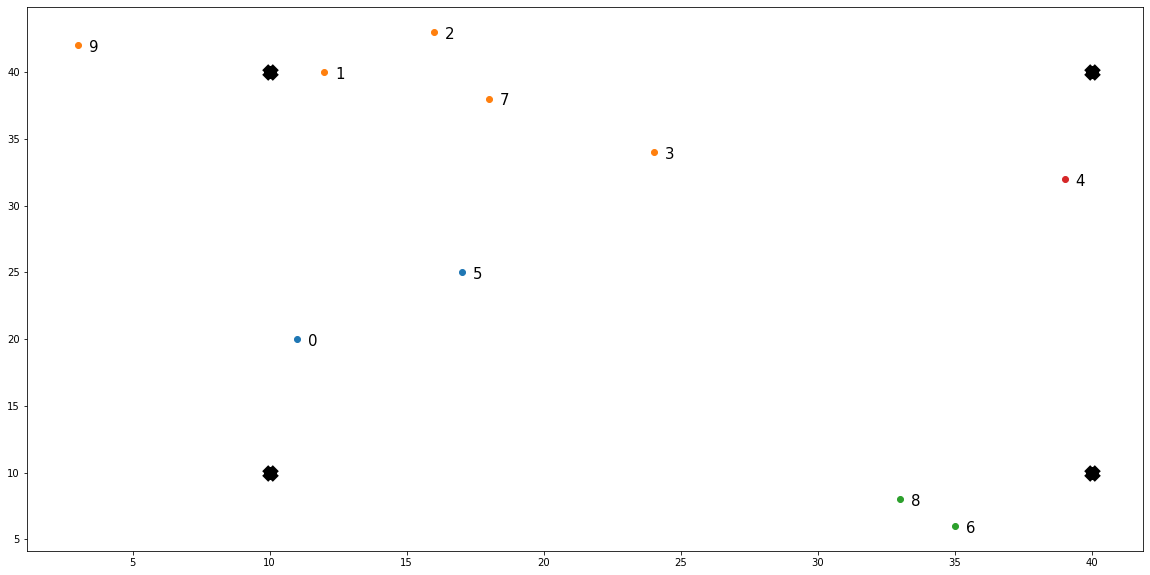

In [17]:


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))



class KMeans:
    
    def __init__(self, K=2, max_iters=1, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        
#         print(self.clusters)
        
        
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples= X.shape[0]

        # randomly take the k index for centroids
#         random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        
#         print(random_sample_idxs)
        
#         print(random_sample_idxs)
        
#         print(self.X[151])
        
        # 
#         self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        self.centroids=[[10, 10], [10, 40],[40,10],[40,40]]

        
#         print(self.centroids)

        # Optimize the clusters
        for _ in range(self.max_iters):
            
            
            self.clusters = self.create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

                
            
#             # Calculate new centroids from the clusters
#             centroids_old = self.centroids
#             self.centroids = self.get_centroids(self.clusters)
            
# #             print(self.centroids)

#             # check if clusters have changed
#             if self.is_converged(centroids_old, self.centroids):
#                 break

#             if self.plot_steps:
#                 self.plot()

        # Classify samples as the index of their clusters
        return self.get_cluster_labels(self.clusters)

    
    
    
    def get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    
    
    

    def create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            
#             print(idx,sample)
#             print(centroids)

            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
            
        print('-------------')
#         print(clusters)    
        
        return clusters
    
    

    def closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
#         print(sample)
        
        distances = [euclidean_distance(sample, point) for point in centroids]
        
#         print(distances)
        closest_index = np.argmin(distances)
        
#         print(closest_index)
        return closest_index

    
    

    def plot(self):
        fig, ax = plt.subplots(figsize=(20, 10))
#         txt=[i for i in range(1,21) ]
        
        c=self.clusters
#         c=np.array(c)
#         c=c+1
        print(c)

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
#             print("index",index)
#             print(self.X[index])
            
#             print(point)

#             x=[]
#             y=[]
            clust=self.clusters[i]

#             print(self.centroids[i])
#             x=

            x=list(point[0])
            y=list(point[1])
        
            print(x)
        
            
        
            x.insert(0,self.centroids[i][0])
            y.insert(0,self.centroids[i][1])
#             print(x,y)
           
            ax.scatter(x,y)
            graph=create_graph(x,y)
#             print(graph)
#             print(type(graph))
            
            best_dist, best_tour = aco_algo(graph,clust,100)
        
            print(f'\nCluster{i+1}, Center=[{self.centroids[i][0]}][{self.centroids[i][1]}]')
            print(f'\nShortest Path = {best_dist}')
            print("Best tour = ",best_tour)
            print("*"*50)
            
            for i, txt in enumerate(index):
                ax.annotate(txt, (point[0][i]+0.4,point[1][i]-0.5), fontsize=15)
                
#             print(index)
#             ax.scatter(*point)
#             plt.text(*point,index)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=15)

        plt.show()


        
k = KMeans(K=4, max_iters=1, plot_steps=True)
y_pred = k.predict(d)
# k.plot()

In [9]:
#   1   2  3   4    5   6  7    8   9    10 11  12
# [-1, 24, 3, 34, 31, 7, 23, 41, 16, 22, -1]

In [10]:
d

array([[11, 20],
       [12, 40],
       [16, 43],
       [24, 34],
       [39, 32],
       [17, 25],
       [35,  6],
       [18, 38],
       [33,  8],
       [ 3, 42]])

In [11]:
d+1

array([[12, 21],
       [13, 41],
       [17, 44],
       [25, 35],
       [40, 33],
       [18, 26],
       [36,  7],
       [19, 39],
       [34,  9],
       [ 4, 43]])

In [12]:
x=[i for i in range(1,21) ]

In [13]:
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [14]:
d.shape

(10, 2)

In [15]:
x.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
x

In [ ]:
a={-1: (10, 10), -2: (10, 40), -3: (40, 10), -4: (40, 40)}
b={1: (10, 10), 2: (10, 40), 3: (40, 10), 4: (40, 40)}

In [ ]:
a.update(b)

In [ ]:
a

In [305]:
d=[12,3,4]

In [306]:

d.insert(0,23)
d

[23, 12, 3, 4]

In [ ]:
[[2, 3, 8, 9, 17, 20, 21, 23, 24, 25, 29, 37, 38, 39, 41, 42, 49], 
 [1, 10, 27, 30, 31, 35, 36, 43, 44, 46], 
 [0, 4, 6, 11, 12, 15, 18, 22, 26, 32, 33, 34, 47], 
 [5, 7, 13, 14, 16, 19, 28, 40, 45, 48]]

Dist=  106.73329996477469
['Start', 23, 8, 9, 21, 29, 2, 20, 25, 42, 39, 41, 24, 37, 17, 38, 3, 49, 'End']
**************************************************

Cluster2, Center=[10][40]

Dist=  64.50337185057823
['Start', 27, 1, 35, 46, 30, 10, 31, 44, 36, 43, 'End']
**************************************************

Cluster3, Center=[40][10]

Dist=  84.34681470797703
['Start', 47, 33, 12, 15, 26, 32, 22, 18, 4, 34, 11, 6, 0, 'End']
**************************************************

Cluster4, Center=[40][40]

Dist=  67.68809503431729
['Start', 45, 13, 5, 48, 40, 16, 28, 7, 19, 14, 'End']